# Predicting hart disease

## Introduction

Relevance. According to a report of the American Heart Association Statistics (2016), heart disease is the leading cause of death for both men and women and responsible for 1 in every 4 deaths, even modest improvements in prognostic models of heart event and complications could save literally hundreds of lives and help to significantly reduce the cost of health care services, medications, and lost productivity.


file:///C:/Users/User/Downloads/350-904-1-PB%20(1).pdf
http://inpressco.com/wp-content/uploads/2017/10/Paper271842-1853.pdf

## Methods 

Deep neural networks (DNN) represents a set of modern machine learning (ML) models that have gain widespread recognition because they were behind the first FDA (US food and drug administration) approved machine learning application in healthcare; to be approved it had to pass tests to show it can produce results at least as accurately as humans are currently able to. Recently, such ML models were also used to detect with cardiologist-level accuracy 14 types of arrhythmias (sometime life-threatening heart beats) form ECG-electrocardiogram signals generated by wearable monitors. 

## Original contribution

Studies exploring the potential of this technology for the prognosis of cardiovascular events/complications from risk factors have been limited; events/complications are, for example, coronary artery disease, stroke and congestive heart failure, and risk factors are those established by the American College of Cardiology/American Heart Association (ACC/AHA) such as age, high blood pressure, high LDL cholesterol, and smoking and others, such as, systolic blood pressure variability, kidney disease, and ethnicity. 

Most of previous studies have either used logistic regression or classical machine learning algorithms such as random forest, gradient boosting and neural networks (non-deep); in addition, comparison studies of the cited algorithms with deep learning models in the specific prognosis context under consideration are not readily available. 

## Research objectives

Establish the relative performance of deep learning models, such as deep belief networks and convolutional neural networks, and ensembles with respect to classical machine learning algorithms (including logistic regression) using cases studies built from well-known heart disease data sets such as the Cleveland set available from the UCI repository. Research questions of interest are, for example, for what would be the threshold of sample size in heart disease studies where the more complex but potentially more effective deep learning models would be recommended?, would ensembles of machine learning models be able to provide more robust predictions as it has been the case in other knowledge domains?, does the ACC/AHA list of eight risk factors should be updated with other genetic or lifestyle factors?. The deep learning models will be implemented in Tensorflow (originally from Google, now open source) and healthcare.ai, an open source that facilitate the development of machine learning in healthcare, with the prevision that can handle so called big data by using the Hadoop/Spark platform.   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from imblearn.over_sampling import SMOTE #for SMOTE -> install package using: conda install -c conda-forge imbalanced-learn 


In [2]:
from scipy import stats, integrate
import matplotlib.pyplot as plt
import ggplot
import scipy
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

import pylab as pl
from itertools import cycle
from sklearn import cross_validation
from sklearn.svm import SVC

C:\Users\RyanT\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\RyanT\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\RyanT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note

In [3]:
features_list = ['colno','age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','Prin1','Prin2','Prin3','Prin4']
dataset1=pd.read_csv("PCA Dataset.csv")
dataset2=pd.read_csv("PCA Dataset.csv")

dataset1 = dataset1.convert_objects(convert_numeric=True)
dataset1.astype('float')



# SVM requires that each data instance is represented as a vector of real numbers

C:\Users\RyanT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


,colno,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute,Prin1,Prin2,Prin3,Prin4
0,0.0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,1.267002,1.077842,3.275992,-2.230928
1,1.0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0,3.343467,1.931036,-0.584535,0.648408
2,2.0,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0,3.346692,-0.469229,-0.491890,0.326108
3,3.0,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,-0.365193,-1.532004,0.617408,-2.747902
4,4.0,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,-2.261643,0.197130,-0.057018,-1.199454
5,5.0,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0,-2.090572,-0.343109,0.531971,0.031870
6,6.0,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3.0,1.946116,1.817276,-0.799080,-2.107508
7,7.0,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0,-0.719720,0.886856,-2.640124,0.846707
8,8.0,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2.0,1.511478,0.106012,0.108582,0.142818
9,9.0,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0,2.847197,-0.966721,1.746448,-1.398227


In [4]:
#### count missing value in terms of colunms #######
#dataset.shape[0] - dataset.count()
dataset1.isnull()
dataset1.isnull().any()

colno             False
age               False
sex               False
cp                False
trestbps          False
chol              False
fbs               False
restecg           False
thalach           False
exang             False
oldpeak           False
slop              False
ca                 True
thal               True
pred_attribute    False
Prin1              True
Prin2              True
Prin3              True
Prin4              True
dtype: bool

In [5]:
dataset1.duplicated().any()

False

There are some values and no duplicated data in this dataset.

In [6]:
def checkforoutlier(df):
    outliersnumbers = 0
    for column in df:
        for number in df[column]:
            if number < np.percentile(
                df[column], 25)-(np.percentile(
                df[column], 75)-np.percentile(
                df[column], 25)) or number > np.percentile(
                df[column], 75)+(np.percentile(
                df[column], 75)-np.percentile(
                df[column], 25)):
                    print("outlier: ", number)
                    outliersnumbers += 1
    return outliersnumbers, 'outliers. That is', round(float(outliersnumbers)/float(len(df[column]))*100, 0), 'percent of the total list'

print(checkforoutlier(dataset1))

outlier:  29
outlier:  77
outlier:  74
outlier:  76
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  172
outlier:  170
outlier:  94
outlier:  170
outlier:  165
outlier:  174
outlier:  178
outlier:  178
outlier:  94
outlier:  170
outlier:  170
outlier:  164
outlier:  354
outlier:  340
outlier:  335
outlier:  353
outlier:  360
outlier:  141
outlier:  341
outlier:  394
outlier:  126
outlier:  149
outlier:  149
outlier:  335
outlier:  342
outlier:  131
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  1
outlier:  

C:\Users\RyanT\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


(119, 'outliers. That is', 41.0, 'percent of the total list')


In [7]:
'drop all the rows that prin1 to prin4 have NA'
dataset1=dataset1.dropna(subset=['Prin1','Prin2','Prin3','Prin4']) 
dataset1

,colno,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute,Prin1,Prin2,Prin3,Prin4
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,1.267002,1.077842,3.275992,-2.230928
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,3.343467,1.931036,-0.584535,0.648408
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,3.346692,-0.469229,-0.491890,0.326108
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,-0.365193,-1.532004,0.617408,-2.747902
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,-2.261643,0.197130,-0.057018,-1.199454
5,5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,-2.090572,-0.343109,0.531971,0.031870
6,6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,1.946116,1.817276,-0.799080,-2.107508
7,7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,-0.719720,0.886856,-2.640124,0.846707
8,8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2,1.511478,0.106012,0.108582,0.142818
9,9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1,2.847197,-0.966721,1.746448,-1.398227


# 1. Preliminary description of the data.
Box plots and histograms were used for continuous and categorical variables.
Basic statistics are also available.

# Univariate analysis

# Continuous variables 
basic statistics + Box plots + histograms 

In [8]:
## basic statistic descriptions
continuas=["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
dataset1[continuas].describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,54.260563,130.528169,243.933099,150.161972,0.993662,0.661972
std,9.091354,16.344002,45.722845,22.290608,1.076325,0.927684
min,29.000000,94.000000,126.000000,90.000000,0.000000,0.000000
25%,47.000000,120.000000,211.000000,135.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.650000,0.000000
75%,61.000000,140.000000,273.000000,166.250000,1.600000,1.000000
max,77.000000,178.000000,394.000000,202.000000,4.400000,3.000000


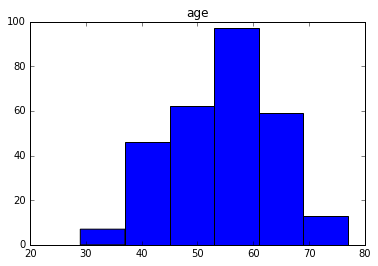

In [9]:
## age histogram
ag= np.array(dataset1['age']) 
plt.hist(ag, bins = 6) 
plt.title("age") 
plt.show()

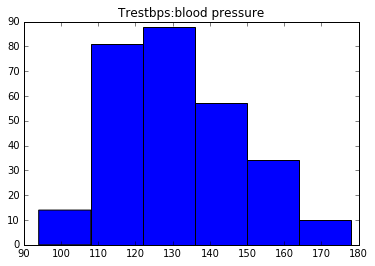

In [10]:
## trestbps histogram
tp= np.array(dataset1['trestbps']) 
plt.hist(tp, bins=6) 
plt.title("Trestbps:blood pressure") 
plt.show()

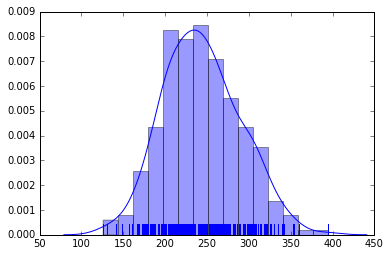

In [11]:
## chol histogram
ch= np.array(dataset1['chol'])
sns.distplot(ch, rug=True, hist=True)


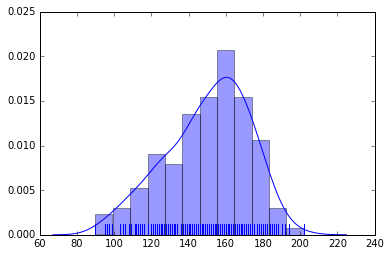

In [12]:
## thalach histogram and distribution 
tl= np.array(dataset1['thalach'])
sns.distplot(tl, rug=True, hist=True)

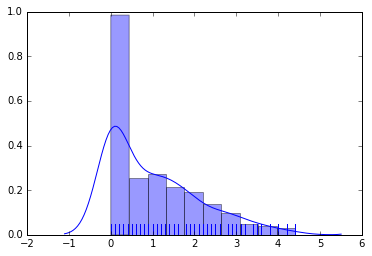

In [13]:
## oldpeak histogram and distribution 
op= np.array(dataset1['oldpeak'])
sns.distplot(op, rug=True, hist=True)

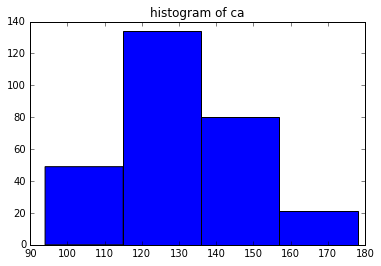

In [14]:
## thalach histogram
ca= np.array(dataset1['ca']) 
plt.hist(tp, bins=4) 
plt.title("histogram of ca") 
plt.show()

### Categorical variables 
##### Histograms + basic statistics

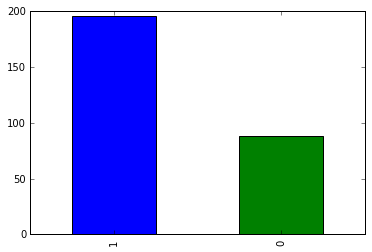

In [15]:
#Sex: sex (1 = male; 0 = female) 
tempo5 = dataset1['sex']
tempo5.value_counts().plot(kind="bar")

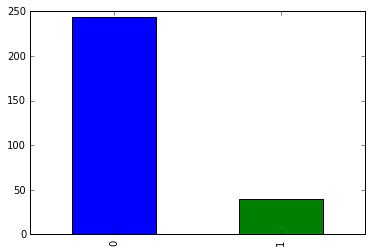

In [16]:
#Fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
tempo6 = dataset1['fbs']
tempo6.value_counts().plot(kind="bar")

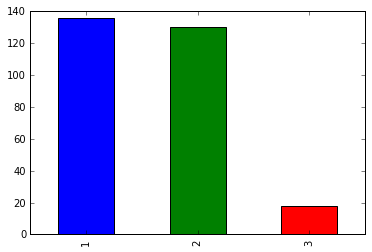

In [17]:
#Slope: the slope of the peak exercise ST segment  
#Value 1: upsloping 
#Value 2: flat 
#Value 3: downsloping
tempo7 = dataset1['slop']
tempo7.value_counts().plot(kind="bar")

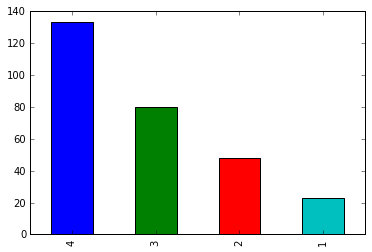

In [18]:
#Cp: chest pain type
#Value 1: typical angina 
#Value 2: atypical angina 
#Value 3: non-anginal pain 
#Value 4: asymptomatic 
tempo8 = dataset1['cp']
tempo8.value_counts().plot(kind="bar")

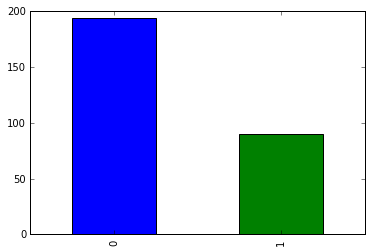

In [19]:
#Exang: exercise induced angina (1 = yes; 0 = no) 
tempo9 = dataset1['exang']
tempo9.value_counts().plot(kind="bar")

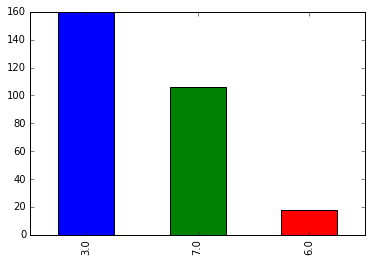

In [20]:
#Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
tempo10 = dataset1['thal']
tempo10.value_counts().plot(kind="bar")

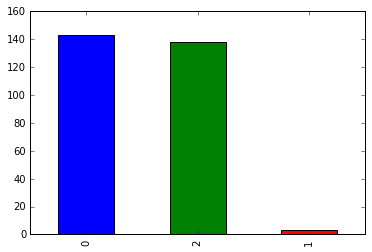

In [21]:
#Restecg: resting electrocardiographic results 
#Value 0: normal 
#Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
#Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
tempo11 = dataset1['restecg']
tempo11.value_counts().plot(kind="bar")

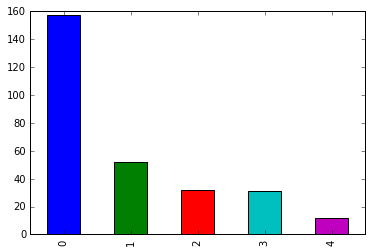

In [22]:
#Class: diagnosis of heart disease (angiographic disease status) 
#Value 0: < 50% diameter narrowing (Healthy)
#Value 1: > 50% diameter narrowing (Sick)
tempo12 = dataset1['pred_attribute']
tempo12.value_counts().plot(kind="bar")

# Multivariate analysis

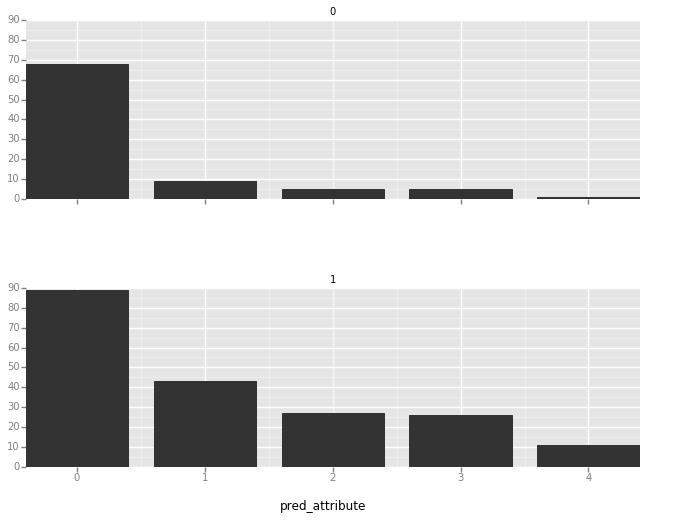

<ggplot: (-9223371863602593655)>

In [23]:
from ggplot import *
p = ggplot(dataset1,aes(x='pred_attribute'))
p + geom_bar()+facet_wrap('sex')  #### relationship between pred_attribute and sex

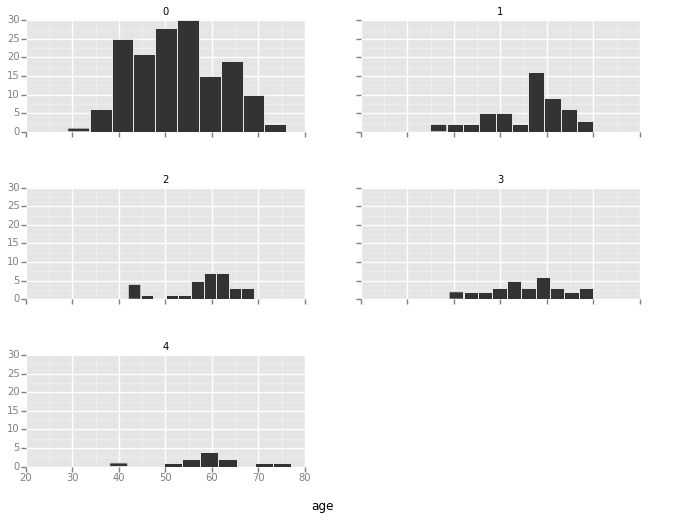

<ggplot: (-9223371863602574318)>

In [24]:
##### relationship between age and trestbps
p = ggplot(dataset1,aes(x='age'))
p+geom_histogram()+facet_wrap('pred_attribute')


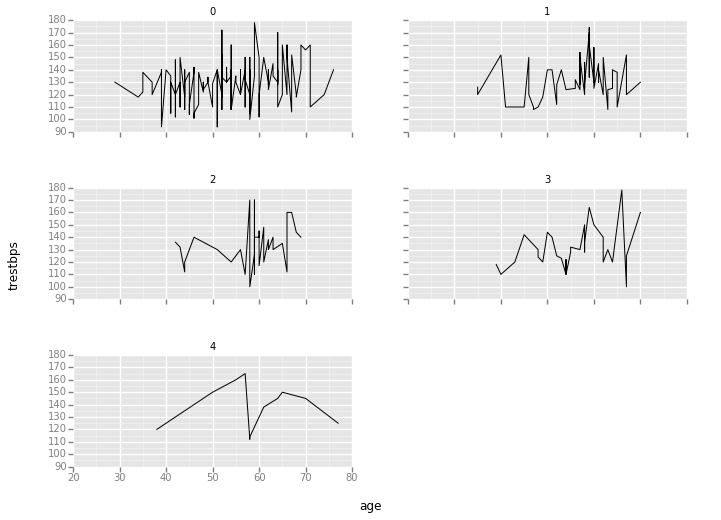

<ggplot: (173252159934)>

In [25]:
p=ggplot(dataset1,aes(x='age',y='trestbps'))
p+geom_line()+facet_wrap('pred_attribute')

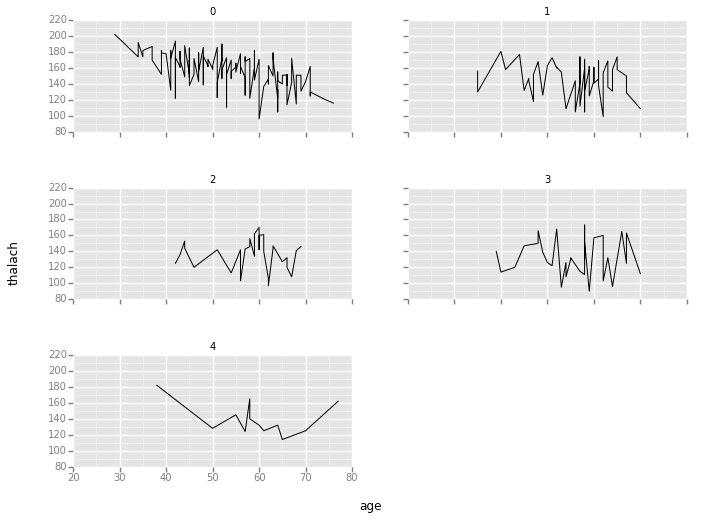

<ggplot: (-9223371863600526406)>

In [26]:
p=ggplot(dataset1,aes(x='age',y='thalach'))
p+geom_line()+facet_wrap('pred_attribute')

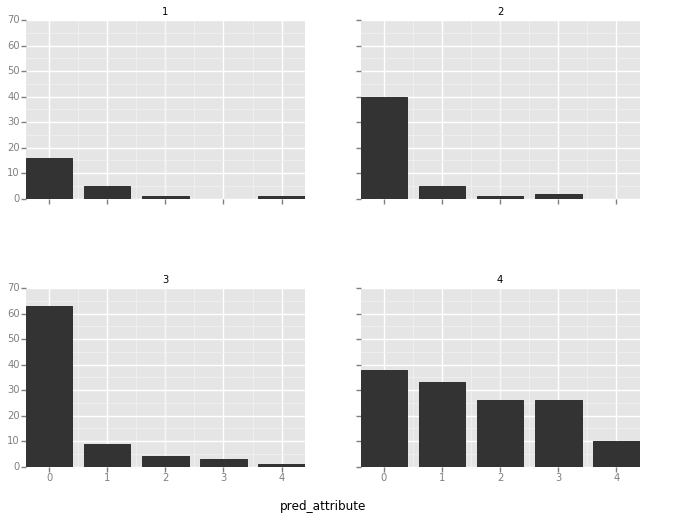

<ggplot: (173254242515)>

In [27]:
p = ggplot(dataset1,aes(x='pred_attribute'))
p + geom_bar()+facet_wrap('cp') 

In [28]:
# p = ggplot(dataset1,aes(x='pred_attribute'))
# p + geom_bar()+facet_wrap('fbs') 
# ggplot(data)+geom_histogram(aes(x=price, fill=cut), position="dodge")

# data processing
 outlier and balance

In [29]:
# ## Boxplots of all continuous variable
# continuas=["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
# dataset[continuas].boxplot(return_type='axes', figsize=(12,8))
# plt.show()

In [30]:
# ### show the patients whose trestbps above 180
# print(dataset[dataset['trestbps']>=180])


In [31]:
# ### show the patients whose chol above 370
# print(dataset[dataset['chol']>400])

In [32]:
# ### show the patients whose thalach below 180
# print(dataset[dataset['thalach']<90])

In [33]:
# ### show the patients whose thalach below 180
# print(dataset[dataset['oldpeak']>5])


In [34]:
# #### delete outliers by mean
# dataset1=dataset1.drop([83,126,188,201,231,48,121,152,181,175,245,91,123])


In [35]:
#import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.cluster import KMeans
#data=dataset1
#estimator = KMeans(n_clusters=3)
#estimator.fit(data)#聚类
#label_pred = estimator.labels_ #获取聚类标签
#centroids = estimator.cluster_centers_ 
#inertia = estimator.inertia_ 
#mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr'] 
#color = 0
#j = 0 
#for i in label_pred:
    #plt.plot([data[j:j+1,0]], [data[j:j+1,1]], mark[i], markersize = 5)
    #j +=1
#plt.show()''''''

# correlation between variables

In [36]:
dataset2.corr()

,colno,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute,Prin1,Prin2,Prin3,Prin4
colno,1.000000,0.001720,-0.078785,-0.000150,-0.023801,-0.109580,-0.019432,-0.140769,-0.096700,-0.005634,-0.116773,-0.023622,0.061803,-0.027288,0.036961,-0.026132,-0.004009,-0.067733,0.034545
age,0.001720,1.000000,-0.079950,0.094052,0.287524,0.178513,0.109595,0.142406,-0.404248,0.092743,0.200725,0.155867,0.376487,0.122338,0.215819,0.494713,0.585628,0.012718,0.084512
sex,-0.078785,-0.079950,1.000000,0.033102,-0.026000,-0.137086,0.061390,0.051510,-0.045438,0.164416,0.173789,0.060025,0.134823,0.412597,0.258758,0.290486,-0.503840,0.493621,0.265926
cp,-0.000150,0.094052,0.033102,1.000000,-0.068248,0.065116,-0.038483,0.075270,-0.317140,0.378304,0.172115,0.127785,0.229203,0.268414,0.399568,0.486428,-0.191024,-0.485652,0.328939
trestbps,-0.023801,0.287524,-0.026000,-0.068248,1.000000,0.108797,0.154575,0.131900,-0.045914,0.010341,0.136443,0.090947,0.078166,0.108860,0.112269,0.231842,0.510894,0.426952,-0.148810
chol,-0.109580,0.178513,-0.137086,0.065116,0.108797,1.000000,-0.009120,0.142677,-0.018168,0.060908,0.027184,-0.011463,0.124256,-0.021939,0.075387,0.117702,0.494518,-0.293300,0.196088
fbs,-0.019432,0.109595,0.061390,-0.038483,0.154575,-0.009120,1.000000,0.049397,-0.014861,0.014229,0.000114,0.056977,0.151630,0.071213,0.051482,0.125554,0.251967,0.556560,0.235864
restecg,-0.140769,0.142406,0.051510,0.075270,0.131900,0.142677,0.049397,1.000000,-0.123555,0.098495,0.101277,0.132040,0.103766,0.001472,0.175938,0.253397,0.306554,0.000910,-0.058477
thalach,-0.096700,-0.404248,-0.045438,-0.317140,-0.045914,-0.018168,-0.014861,-0.123555,1.000000,-0.378433,-0.344953,-0.373728,-0.298559,-0.304417,-0.420362,-0.709399,-0.035486,0.234500,0.067363
exang,-0.005634,0.092743,0.164416,0.378304,0.010341,0.060908,0.014229,0.098495,-0.378433,1.000000,0.295724,0.249233,0.163884,0.334949,0.401986,0.595517,-0.262498,-0.263000,0.099267


### 2. Define training and test samples. 

The Cleveland data set available from the UCI repository has 303 samples; the training and test data sets were randomly selected with 30% of the original data set corresponding to the test data set.  The relative proportions of the classes of interest (disease/no disease) in both sets were checked to be similar.

In [37]:
### Extract features and labels from dataset for local testing:

dataset1.dropna(inplace=True, axis=0, how="any")
X=dataset1.loc[:,['Prin1','Prin2','Prin3','Prin4']] #The 4 principal components
Y=dataset1["pred_attribute"]


In [38]:
# evaluate the model by splitting into train and test sets  #Edit by ryan, we aim to do 3 traditional sets in the end, this first split is 80/20
features_train, features_test, labels_train, labels_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [39]:
import collections

list1 = []
for i in labels_train:
    list1.append(i)
counter=collections.Counter(list1)
print(counter)

list2 = []
for i in labels_test:
    list2.append(i)
counter=collections.Counter(list2)
print(counter)

Counter({0: 127, 1: 40, 3: 26, 2: 23, 4: 11})
Counter({0: 30, 1: 12, 2: 9, 3: 5, 4: 1})


In [40]:
# Check
print(len(features_train)/(len(features_train)+ len(features_test)))

0.7992957746478874


We have an relatively small dataset. Therefore, we should do our feature selection based on a cross-
validated set. We will check this assumption by comparing the scores on a cross-validated set vs the simple split.

In [41]:
features_train_cross, features_test_cross, labels_train_cross, labels_test_cross = train_test_split(X, Y, test_size=0.15, random_state=0)



### SMOTE for SVM - Balancing only on the training set, not the validation set  [This is for the traditional training -not the cross validated one]

In [42]:
#further divide the 'traditional' non-cross set into training 80/20  for pure training and cross validation  
features_train_notoversampled, features_validate, labels_train_notoversampled, labels_validate = train_test_split(features_train, labels_train, test_size = .15, random_state=0)

sm = SMOTE(random_state=0, ratio = 1.0, kind= 'svm' )
#x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
features_train_oversampled, labels_train_oversampled = sm.fit_sample(features_train_notoversampled, labels_train_notoversampled)

#re-enter into original variables
##features_train = features_train_oversampled
##labels_train = labels_train_oversampled

#Below 2 lines if we want to want to force the array back into dataframe    
##features_train = pd.DataFrame(features_train_oversampled,columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slop","ca","thal"])
##labels_train = pd.DataFrame(labels_train_oversampled,columns=["pred_attribute"])

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


### 3. Make models

#### 3.1 make pipeline

##### scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

SVM needs a scalar: https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf

MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. However, this scaling compress all inliers in the narrow ranges. Minmaxscalar also suffers from the presence of large outliers. 

In [44]:
scaler = preprocessing.MinMaxScaler()

Unlike the previous scaler, the centering and scaling statistics of Robust scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers. Consequently, the resulting range of the transformed feature values is larger than for the previous scalers and, more importantly, are approximately similar: for both features most of the transformed values lie in a [-2, 3] range as seen in the zoomed-in figure. Note that the outliers themselves are still present in the transformed data. If a separate outlier clipping is desirable, a non-linear transformation is required (see below).

In [45]:
Robust_scaler = preprocessing.RobustScaler(quantile_range=(25, 75))

QuantileTransformer applies a non-linear transformation such that the probability density function of each feature will be mapped to a uniform distribution. In this case, all the data will be mapped in the range [0, 1], even the outliers which cannot be distinguished anymore from the inliers. QuantileTransformer has an additional output_distribution parameter allowing to match a Gaussian distribution instead of a uniform distribution


In [46]:
Quantile_scalar = preprocessing.QuantileTransformer(output_distribution='normal')

##### Selecting features

SelectKBest is way to select the most powerfull features. It is also possible to do this manually, in my experience this may improve the results drastically.

In [47]:
from sklearn.feature_selection import SelectKBest

#PCA do not need SKB!
skb = SelectKBest(k = 2)
skb3 = SelectKBest(k = 3)
skb4 = SelectKBest(k = 4)
skb7 = SelectKBest(k = 7)

#### 3.2 selecting a Kernel & it's parameters

##### start with RGB, because we don't have a lot of features.

In [48]:
# Nice visualisations:
    
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# import data
X = np.array(features_test)
y = np.array(labels_test)
class_names = np.array(['No disease', 'Disease 1', 'Disease 2', 'Disease 3', 'Disease 4'],
      dtype='<U10')

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# # Run classifier, using a model that is too regularized (C too low) to see
# # the impact on the results
# classifier = svm.SVC(kernel='linear', C=0.01)
# y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

In [49]:
from sklearn.metrics import accuracy_score
from sklearn import grid_search
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import svm

def checkmetrics(pred, labels_test, name):
    print('The accuracy is of a', name, 'is: ', accuracy_score(pred, labels_test))
    # print 'if everyone had 0 score: ', float(float(len(pred))-float(numberpoi))/float(len(pred))
#     matrix = confusion_matrix(labels_test, pred)
#     print('There are', matrix[0][0], 'healthy people correctly identified vs', matrix[2][2] +matrix[3][3] +matrix[4][4] +matrix[1][1], 'sick ones. See:\n', matrix)
    print(classification_report(pred, labels_test))
    
   

#     print('precision score:', precision_score( pred, labels_test))
#     if precision_score(pred, labels_test) < recall_score(pred, labels_test):
#         print('precision < recall, so higher chance on POIs get identified, but also more false positives')
#     if precision_score(pred, labels_test) > recall_score(pred, labels_test):
#         print('precision > recall, so lower chance on POIs get identified, but also less false positives')
#     print('f1 score: ', f1_score(pred, labels_test), '\n\n')

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


The accuracy is of a Without SMOTE for training- Validation - support vector machine, Radial Basis Function is:  0.6
             precision    recall  f1-score   support

          0       0.95      0.79      0.86        24
          1       0.20      0.17      0.18         6
          2       0.00      0.00      0.00         2
          3       0.20      0.33      0.25         3
          4       0.00      0.00      0.00         0

avg / total       0.70      0.60      0.64        35

Confusion matrix, without normalization
[[19  1  0  0  0]
 [ 2  1  0  2  0]
 [ 0  1  0  0  0]
 [ 3  1  0  1  0]
 [ 0  2  2  0  0]]


C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Normalized confusion matrix
[[ 0.95  0.05  0.    0.    0.  ]
 [ 0.4   0.2   0.    0.4   0.  ]
 [ 0.    1.    0.    0.    0.  ]
 [ 0.6   0.2   0.    0.2   0.  ]
 [ 0.    0.5   0.5   0.    0.  ]]


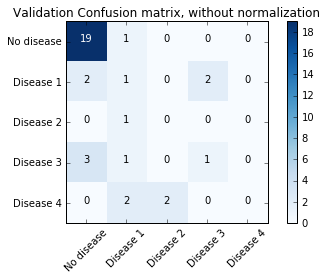

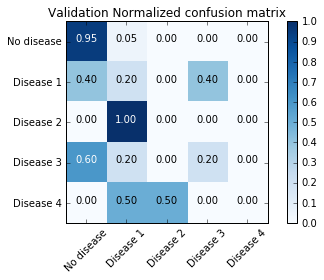

In [50]:
### DONE

clf = SVC(kernel="rbf")
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'Without SMOTE for training- Validation - support vector machine, Radial Basis Function')

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_validate, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Validation Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Validation Normalized confusion matrix')
plt.show()

The accuracy is of a Without SMOTE for training - Test - support vector machine, Radial Basis Function is:  0.614035087719
             precision    recall  f1-score   support

          0       1.00      0.73      0.85        41
          1       0.25      0.38      0.30         8
          2       0.22      0.50      0.31         4
          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00         0

avg / total       0.77      0.61      0.67        57

Confusion matrix, without normalization
[[30  0  0  0  0]
 [ 8  3  0  1  0]
 [ 1  3  2  3  0]
 [ 1  2  2  0  0]
 [ 1  0  0  0  0]]
Normalized confusion matrix
[[ 1.    0.    0.    0.    0.  ]
 [ 0.67  0.25  0.    0.08  0.  ]
 [ 0.11  0.33  0.22  0.33  0.  ]
 [ 0.2   0.4   0.4   0.    0.  ]
 [ 1.    0.    0.    0.    0.  ]]


C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


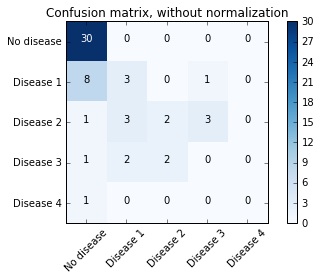

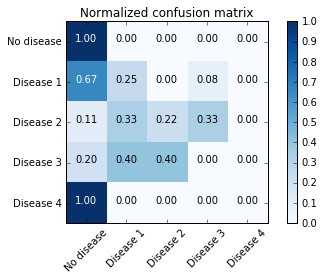

In [51]:
#-----------------------------------------

pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'Without SMOTE for training - Test - support vector machine, Radial Basis Function')

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


#-----------------------------------------

The accuracy is of a With SMOTE for training- Validation - support vector machine, Radial Basis Function is:  0.485714285714
             precision    recall  f1-score   support

          0       0.75      0.83      0.79        18
          1       0.00      0.00      0.00        10
          2       0.00      0.00      0.00         1
          3       0.20      0.25      0.22         4
          4       0.25      0.50      0.33         2

avg / total       0.42      0.49      0.45        35

Confusion matrix, without normalization
[[15  5  0  0  0]
 [ 2  0  0  3  0]
 [ 0  1  0  0  0]
 [ 1  2  0  1  1]
 [ 0  2  1  0  1]]
Normalized confusion matrix
[[ 0.75  0.25  0.    0.    0.  ]
 [ 0.4   0.    0.    0.6   0.  ]
 [ 0.    1.    0.    0.    0.  ]
 [ 0.2   0.4   0.    0.2   0.2 ]
 [ 0.    0.5   0.25  0.    0.25]]


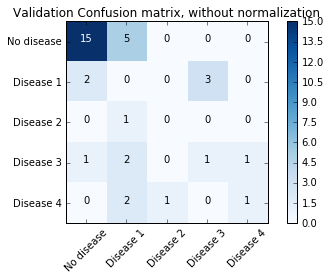

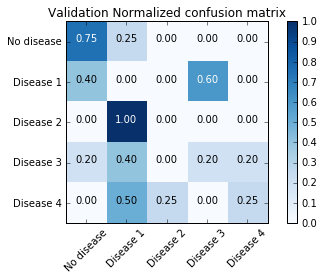

In [52]:
### DONE

clf = SVC(kernel="rbf")
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'With SMOTE for training- Validation - support vector machine, Radial Basis Function')

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_validate, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Validation Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Validation Normalized confusion matrix')
plt.show()

The accuracy is of a With SMOTE for training - Test - support vector machine, Radial Basis Function is:  0.526315789474
             precision    recall  f1-score   support

          0       0.80      0.80      0.80        30
          1       0.33      0.31      0.32        13
          2       0.22      0.50      0.31         4
          3       0.00      0.00      0.00        10
          4       0.00      0.00      0.00         0

avg / total       0.51      0.53      0.52        57

Confusion matrix, without normalization
[[24  4  0  2  0]
 [ 5  4  0  3  0]
 [ 0  2  2  5  0]
 [ 1  2  2  0  0]
 [ 0  1  0  0  0]]
Normalized confusion matrix
[[ 0.8   0.13  0.    0.07  0.  ]
 [ 0.42  0.33  0.    0.25  0.  ]
 [ 0.    0.22  0.22  0.56  0.  ]
 [ 0.2   0.4   0.4   0.    0.  ]
 [ 0.    1.    0.    0.    0.  ]]


C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


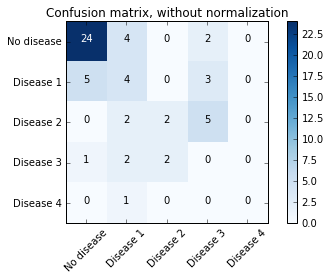

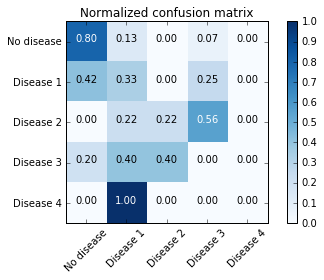

In [53]:
#-----------------------------------------

pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'With SMOTE for training - Test - support vector machine, Radial Basis Function')

# Compute confusion matrix
cnf_matrix = confusion_matrix(labels_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


#-----------------------------------------

The other ones seem to be just as bad:

In [54]:
clf =  Pipeline(steps=[('scaling', scaler), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'Without SMOTE - Validate support vector machine, Radial Basis Function scaled')

clf =  Pipeline(steps=[('scaling',Robust_scaler), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'Without SMOTE - Validate support vector machine, Radial Basis Function Robust scaled')

clf =  Pipeline(steps=[('scaling', Quantile_scalar), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'Without SMOTE - Validate support vector machine, Radial Basis Function Normal scaled')

clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'Without SMOTE - Validate support vector machine, Radial Basis Function scaled & selected')

The accuracy is of a Without SMOTE - Validate support vector machine, Radial Basis Function scaled is:  0.571428571429
             precision    recall  f1-score   support

          0       1.00      0.57      0.73        35
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0

avg / total       1.00      0.57      0.73        35

The accuracy is of a Without SMOTE - Validate support vector machine, Radial Basis Function Robust scaled is:  0.6
             precision    recall  f1-score   support

          0       0.95      0.79      0.86        24
          1       0.40      0.22      0.29         9
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         0

avg / total       0.75      0.60      0.67        35

The accuracy is of

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [55]:
clf =  Pipeline(steps=[('scaling', scaler), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'Without SMOTE - Test support vector machine, Radial Basis Function scaled')

clf =  Pipeline(steps=[('scaling',Robust_scaler), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'Without SMOTE - Test support vector machine, Radial Basis Function Robust scaled')

clf =  Pipeline(steps=[('scaling', Quantile_scalar), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'Without SMOTE - Test support vector machine, Radial Basis Function Normal scaled')

clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'Without SMOTE - Test support vector machine, Radial Basis Function scaled & selected')

The accuracy is of a Without SMOTE - Test support vector machine, Radial Basis Function scaled is:  0.526315789474
             precision    recall  f1-score   support

          0       1.00      0.53      0.69        57
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0

avg / total       1.00      0.53      0.69        57

The accuracy is of a Without SMOTE - Test support vector machine, Radial Basis Function Robust scaled is:  0.578947368421
             precision    recall  f1-score   support

          0       1.00      0.67      0.80        45
          1       0.17      0.20      0.18        10
          2       0.11      0.50      0.18         2
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0

avg / total       0.82      0.58      0.67        57

The accuracy is

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [56]:
clf =  Pipeline(steps=[('scaling', scaler), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'With SMOTE - Validate support vector machine, Radial Basis Function scaled')

clf =  Pipeline(steps=[('scaling',Robust_scaler), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'With SMOTE - Validate support vector machine, Radial Basis Function Robust scaled')

clf =  Pipeline(steps=[('scaling', Quantile_scalar), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'With SMOTE - Validate support vector machine, Radial Basis Function Normal scaled')

clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'With SMOTE - Validate support vector machine, Radial Basis Function scaled & selected')

The accuracy is of a With SMOTE - Validate support vector machine, Radial Basis Function scaled is:  0.6
             precision    recall  f1-score   support

          0       0.90      0.90      0.90        20
          1       0.60      0.21      0.32        14
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0

avg / total       0.75      0.60      0.64        35

The accuracy is of a With SMOTE - Validate support vector machine, Radial Basis Function Robust scaled is:  0.6
             precision    recall  f1-score   support

          0       0.85      0.85      0.85        20
          1       0.20      0.14      0.17         7
          2       0.00      0.00      0.00         2
          3       0.20      0.33      0.25         3
          4       0.50      0.67      0.57         3

avg / total       0.59      0.60      0.59        35

The accuracy is of a With SMOTE - V

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [57]:
clf =  Pipeline(steps=[('scaling', scaler), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'With SMOTE - Test support vector machine, Radial Basis Function scaled')

clf =  Pipeline(steps=[('scaling',Robust_scaler), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'With SMOTE - Test support vector machine, Radial Basis Function Robust scaled')

clf =  Pipeline(steps=[('scaling', Quantile_scalar), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'With SMOTE - Test support vector machine, Radial Basis Function Normal scaled')

clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ('support vector machine', SVC(kernel="rbf"))])
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'With SMOTE - Test support vector machine, Radial Basis Function scaled & selected')

The accuracy is of a With SMOTE - Test support vector machine, Radial Basis Function scaled is:  0.578947368421
             precision    recall  f1-score   support

          0       0.90      0.77      0.83        35
          1       0.50      0.29      0.36        21
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0

avg / total       0.74      0.58      0.64        57

The accuracy is of a With SMOTE - Test support vector machine, Radial Basis Function Robust scaled is:  0.59649122807
             precision    recall  f1-score   support

          0       0.90      0.82      0.86        33
          1       0.42      0.33      0.37        15
          2       0.22      0.50      0.31         4
          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00         1

avg / total       0.65      0.60      0.62        57

The accuracy is of a W

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [58]:
# trying poly
clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ('support vector machine', SVC(kernel="poly"))])
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'Without SMOTE - Validate -support vector machine, Poly, scaled & clustered')

The accuracy is of a Without SMOTE - Validate -support vector machine, Poly, scaled & clustered is:  0.571428571429
             precision    recall  f1-score   support

          0       1.00      0.61      0.75        33
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0

avg / total       0.94      0.57      0.71        35



C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [59]:
# trying poly
clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ('support vector machine', SVC(kernel="poly"))])
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'Without SMOTE - Test -support vector machine, Poly, scaled & clustered')

The accuracy is of a Without SMOTE - Test -support vector machine, Poly, scaled & clustered is:  0.526315789474
             precision    recall  f1-score   support

          0       1.00      0.53      0.69        57
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0

avg / total       1.00      0.53      0.69        57



C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [60]:
# trying poly
clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ('support vector machine', SVC(kernel="poly"))])
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'With SMOTE - Validate -support vector machine, Poly, scaled & clustered')

The accuracy is of a With SMOTE - Validate -support vector machine, Poly, scaled & clustered is:  0.628571428571
             precision    recall  f1-score   support

          0       1.00      0.80      0.89        25
          1       0.40      0.22      0.29         9
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0

avg / total       0.82      0.63      0.71        35



C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [61]:
# trying poly
clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ('support vector machine', SVC(kernel="poly"))])
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'With SMOTE - Test -support vector machine, Poly, scaled & clustered')

The accuracy is of a With SMOTE - Test -support vector machine, Poly, scaled & clustered is:  0.508771929825
             precision    recall  f1-score   support

          0       0.93      0.62      0.75        45
          1       0.08      0.09      0.09        11
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         1

avg / total       0.75      0.51      0.61        57



C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


There seems to lay far too much weight on the first category due to their high number. 

##### Try other peoples classifiers:

In [62]:
#used some ideas from http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

#linear kernel
def svm_linear(features_train, features_test, labels_train, labels_test):

    clf = svm.SVC(
        C=1.0, 
        kernel='linear', 
        probability=False, 
        shrinking=True, 
        tol=1e-3, 
        verbose=False, 
        max_iter=-1, 
        decision_function_shape=None,
        random_state=None)

    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)
    print("Kernel: Linear")
    print("Performance: "  + str(clf.score(features_test, labels_test)))
    print("")
    return pred

#polynomial kernel from degrees 2 to 5
def svm_poly(features_train, features_test, labels_train, labels_test):

    for d in [2, 3, 4, 5]:

        clf = svm.SVC(
            C=1.0,
            kernel='poly', 
            degree=d,
            gamma='auto',
            coef0=0.0,
            probability=False,
            shrinking=True,
            tol=1e-3,
            verbose=False,
            max_iter=400000,
            decision_function_shape=None,
            random_state=None)
        clf.fit(features_train, labels_train)
        pred = clf.predict(features_test)
        print("Kernel: Polynomial")
        print("Degree: " + str(d))
        print("Performance: "  + str(clf.score(features_test, labels_test)))
        print("")
    return pred

#radial basis function kernel
def svm_rbf(features_train, features_test, labels_train, labels_test):

    clf = svm.SVC(
        C=1.0,
        kernel='rbf',
        gamma='auto',
        probability=False,
        shrinking=True,
        tol=1e-3,
        verbose=False,
        max_iter=-1,
        decision_function_shape=None,
        random_state=None)

    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)
    print("Kernel: Radial Basis Function")
    print("Performance: "  + str(clf.score(features_test, labels_test)))
    print("")
    return pred

#sigmoid function kernel
def svm_sigmoid(features_train, features_test, labels_train, labels_test):

    clf = svm.SVC(
        C=1.0,
        kernel='sigmoid',
        gamma='auto',
        coef0=0.0,
        probability=False,
        shrinking=True,
        tol=1e-3,
        verbose=False,
        max_iter=-1,
        decision_function_shape=None,
        random_state=None)
    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)
    print("Kernel: Sigmoid")
    print("Performance: "  + str(clf.score(features_test, labels_test)))
    print("")
    return pred

In [63]:
#Run SVM with a linear kernel
pred = svm_linear(features_train_notoversampled, features_validate, labels_train_notoversampled, labels_validate)
checkmetrics(pred, labels_validate, 'Without SMOTE - Validate - linearSVM, from function')

#Run SVM with a polynomial kernel
pred = svm_poly(features_train_notoversampled, features_validate, labels_train_notoversampled, labels_validate)
checkmetrics(pred, labels_validate, 'Without SMOTE - Validate - polySVM, from function')

#Run SVM with a radial basis function kernel
pred = svm_rbf(features_train_notoversampled, features_validate, labels_train_notoversampled, labels_validate)
checkmetrics(pred, labels_validate, 'Without SMOTE - Validate - RBFSVM, from function')

#Run SVM with a sigmoid kernel
pred = svm_sigmoid(features_train_notoversampled, features_validate, labels_train_notoversampled, labels_validate)
checkmetrics(pred, labels_validate, 'Without SMOTE - Validate - SIGSVM, from function')

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Kernel: Linear
Performance: 0.6

The accuracy is of a Without SMOTE - Validate - linearSVM, from function is:  0.6
             precision    recall  f1-score   support

          0       0.95      0.79      0.86        24
          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00         4
          3       0.40      0.33      0.36         6
          4       0.00      0.00      0.00         0

avg / total       0.72      0.60      0.65        35

Kernel: Polynomial
Degree: 2
Performance: 0.571428571429

Kernel: Polynomial
Degree: 3
Performance: 0.571428571429

Kernel: Polynomial
Degree: 4
Performance: 0.6

Kernel: Polynomial
Degree: 5
Performance: 0.542857142857

The accuracy is of a Without SMOTE - Validate - polySVM, from function is:  0.542857142857
             precision    recall  f1-score   support

          0       0.85      0.71      0.77        24
          1       0.00      0.00      0.00         4
          2       0.00      0.00      0

In [64]:
#Run SVM with a linear kernel
pred = svm_linear(features_train_notoversampled, features_test, labels_train_notoversampled, labels_test)
checkmetrics(pred, labels_test, 'Without SMOTE - Test - linearSVM, from function')

#Run SVM with a polynomial kernel
pred = svm_poly(features_train_notoversampled, features_test, labels_train_notoversampled, labels_test)
checkmetrics(pred, labels_test, 'Without SMOTE - Test -polySVM, from function')

#Run SVM with a radial basis function kernel
pred = svm_rbf(features_train_notoversampled, features_test, labels_train_notoversampled, labels_test)
checkmetrics(pred, labels_test, 'Without SMOTE - Test -RBFSVM, from function')

#Run SVM with a sigmoid kernel
pred = svm_sigmoid(features_train_notoversampled, features_test, labels_train_notoversampled, labels_test)
checkmetrics(pred, labels_test, 'Without SMOTE - Test -SIGSVM, from function')

Kernel: Linear
Performance: 0.666666666667

The accuracy is of a Without SMOTE - Test - linearSVM, from function is:  0.666666666667
             precision    recall  f1-score   support

          0       0.93      0.72      0.81        39
          1       0.33      0.44      0.38         9
          2       0.33      0.75      0.46         4
          3       0.60      0.60      0.60         5
          4       0.00      0.00      0.00         0

avg / total       0.77      0.67      0.70        57

Kernel: Polynomial
Degree: 2
Performance: 0.526315789474

Kernel: Polynomial
Degree: 3
Performance: 0.578947368421

Kernel: Polynomial
Degree: 4
Performance: 0.491228070175

Kernel: Polynomial
Degree: 5
Performance: 0.543859649123

The accuracy is of a Without SMOTE - Test -polySVM, from function is:  0.543859649123
             precision    recall  f1-score   support

          0       0.93      0.64      0.76        44
          1       0.17      0.40      0.24         5
          2    

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [65]:
#Run SVM with a linear kernel
pred = svm_linear(features_train_oversampled, features_validate, labels_train_oversampled, labels_validate)
checkmetrics(pred, labels_validate, 'With SMOTE - Validate -linearSVM, from function')

#Run SVM with a polynomial kernel
pred = svm_poly(features_train_oversampled, features_validate, labels_train_oversampled, labels_validate)
checkmetrics(pred, labels_validate, 'With SMOTE - Validate -polySVM, from function')

#Run SVM with a radial basis function kernel
pred = svm_rbf(features_train_oversampled, features_validate, labels_train_oversampled, labels_validate)
checkmetrics(pred, labels_validate, 'With SMOTE - Validate -RBFSVM, from function')

#Run SVM with a sigmoid kernel
pred = svm_sigmoid(features_train_oversampled, features_validate, labels_train_oversampled, labels_validate)
checkmetrics(pred, labels_validate, 'With SMOTE - Validate -SIGSVM, from function')

Kernel: Linear
Performance: 0.628571428571

The accuracy is of a With SMOTE - Validate -linearSVM, from function is:  0.628571428571
             precision    recall  f1-score   support

          0       0.85      0.89      0.87        19
          1       0.60      0.23      0.33        13
          2       0.00      0.00      0.00         1
          3       0.20      1.00      0.33         1
          4       0.25      1.00      0.40         1

avg / total       0.70      0.63      0.62        35

Kernel: Polynomial
Degree: 2
Performance: 0.371428571429

Kernel: Polynomial
Degree: 3
Performance: 0.571428571429

Kernel: Polynomial
Degree: 4
Performance: 0.457142857143

Kernel: Polynomial
Degree: 5
Performance: 0.571428571429

The accuracy is of a With SMOTE - Validate -polySVM, from function is:  0.571428571429
             precision    recall  f1-score   support

          0       0.85      0.77      0.81        22
          1       0.20      0.20      0.20         5
          2   

In [66]:
#Run SVM with a linear kernel
pred = svm_linear(features_train_oversampled, features_test, labels_train_oversampled, labels_test)
checkmetrics(pred, labels_test, 'With SMOTE - Test -linearSVM, from function')

#Run SVM with a polynomial kernel
pred = svm_poly(features_train_oversampled, features_test, labels_train_oversampled, labels_test)
checkmetrics(pred, labels_test, 'With SMOTE - Test -polySVM, from function')

#Run SVM with a radial basis function kernel
pred = svm_rbf(features_train_oversampled, features_test, labels_train_oversampled, labels_test)
checkmetrics(pred, labels_test, 'With SMOTE - Test -RBFSVM, from function')

#Run SVM with a sigmoid kernel
pred = svm_sigmoid(features_train_oversampled, features_test, labels_train_oversampled, labels_test)
checkmetrics(pred, labels_test, 'With SMOTE - Test -SIGSVM, from function')

Kernel: Linear
Performance: 0.614035087719

The accuracy is of a With SMOTE - Test -linearSVM, from function is:  0.614035087719
             precision    recall  f1-score   support

          0       0.90      0.79      0.84        34
          1       0.50      0.33      0.40        18
          2       0.22      1.00      0.36         2
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         3

avg / total       0.70      0.61      0.64        57

Kernel: Polynomial
Degree: 2
Performance: 0.40350877193

Kernel: Polynomial
Degree: 3


C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Performance: 0.614035087719

Kernel: Polynomial
Degree: 4
Performance: 0.456140350877

Kernel: Polynomial
Degree: 5
Performance: 0.456140350877

The accuracy is of a With SMOTE - Test -polySVM, from function is:  0.456140350877
             precision    recall  f1-score   support

          0       0.77      0.68      0.72        34
          1       0.17      0.18      0.17        11
          2       0.11      0.20      0.14         5
          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00         2

avg / total       0.50      0.46      0.47        57

Kernel: Radial Basis Function
Performance: 0.526315789474

The accuracy is of a With SMOTE - Test -RBFSVM, from function is:  0.526315789474
             precision    recall  f1-score   support

          0       0.80      0.80      0.80        30
          1       0.33      0.31      0.32        13
          2       0.22      0.50      0.31         4
          3       0.00      0.00      0.00  

Although the Linear one is performing a little bit better here, there seems to be a very big focus on the non-disease. Still not good: try some automatic tuning: trying gridsearch

In [67]:
#### Can we use gridsearch for feature selection?

# still not good: try some automatic tuning:
# trying gridsearch
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
grid = grid_search.GridSearchCV(svr, parameters)
clf =  Pipeline(steps=[('scaling',scaler), ("Grid", grid)])
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'No SMOTE - Validate - support vector machine, with gridsearch')


parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
grid = grid_search.GridSearchCV(svr, parameters)
clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ("Grid", grid)])
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'No SMOTE - Validate - support vector machine, with gridsearch & only the best 2 features')

### Impossible to do SKB 7 when we have only max 4 prinicpal components from PCA
# parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
# svr = svm.SVC()
# grid = grid_search.GridSearchCV(svr, parameters)
# clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb7), ("Grid", grid)])
# clf.fit(features_train_notoversampled, labels_train_notoversampled)
# pred = clf.predict(features_validate)
# checkmetrics(pred, labels_validate, 'No SMOTE - Validate - support vector machine, with gridsearch & only the best 7 features')

The accuracy is of a No SMOTE - Validate - support vector machine, with gridsearch is:  0.657142857143
             precision    recall  f1-score   support

          0       1.00      0.83      0.91        24
          1       0.60      0.43      0.50         7
          2       0.00      0.00      0.00         4
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0

avg / total       0.81      0.66      0.72        35

The accuracy is of a No SMOTE - Validate - support vector machine, with gridsearch & only the best 2 features is:  0.628571428571
             precision    recall  f1-score   support

          0       1.00      0.80      0.89        25
          1       0.20      1.00      0.33         1
          2       1.00      0.11      0.20         9
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0

avg / total       0.98      0.63      0.70        35



C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [68]:
#### Can we use gridsearch for feature selection?  

# still not good: try some automatic tuning:
# trying gridsearch
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
grid = grid_search.GridSearchCV(svr, parameters)
clf =  Pipeline(steps=[('scaling',scaler), ("Grid", grid)])
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'No SMOTE - Test - support vector machine, with gridsearch')


parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
grid = grid_search.GridSearchCV(svr, parameters)
clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ("Grid", grid)])
clf.fit(features_train_notoversampled, labels_train_notoversampled)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'No SMOTE - Test - support vector machine, with gridsearch & only the best 2 features')

# parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
# svr = svm.SVC()
# grid = grid_search.GridSearchCV(svr, parameters)
# clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb7), ("Grid", grid)])
# clf.fit(features_train_notoversampled, labels_train_notoversampled)
# pred = clf.predict(features_test)
# checkmetrics(pred, labels_test, 'No SMOTE - Test - support vector machine, with gridsearch & only the best 7 features')

The accuracy is of a No SMOTE - Test - support vector machine, with gridsearch is:  0.59649122807
             precision    recall  f1-score   support

          0       1.00      0.68      0.81        44
          1       0.17      0.20      0.18        10
          2       0.22      0.67      0.33         3
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0

avg / total       0.81      0.60      0.68        57

The accuracy is of a No SMOTE - Test - support vector machine, with gridsearch & only the best 2 features is:  0.59649122807
             precision    recall  f1-score   support

          0       1.00      0.67      0.80        45
          1       0.17      0.33      0.22         6
          2       0.22      0.33      0.27         6
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         0

avg / total       0.83      0.60      0.68        57



C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [69]:
#### Can we use gridsearch for feature selection?

# still not good: try some automatic tuning:
# trying gridsearch
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
grid = grid_search.GridSearchCV(svr, parameters)
clf =  Pipeline(steps=[('scaling',scaler), ("Grid", grid)])
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'With SMOTE - Validate -support vector machine, with gridsearch')


parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
grid = grid_search.GridSearchCV(svr, parameters)
clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ("Grid", grid)])
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_validate)
checkmetrics(pred, labels_validate, 'With SMOTE - Validate -support vector machine, with gridsearch & only the best 2 features')

# parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
# svr = svm.SVC()
# grid = grid_search.GridSearchCV(svr, parameters)
# clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb7), ("Grid", grid)])
# clf.fit(features_train_oversampled, labels_train_oversampled)
# pred = clf.predict(features_validate)
# checkmetrics(pred, labels_validate, 'With SMOTE - Validate -support vector machine, with gridsearch & only the best 7 features')

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


The accuracy is of a With SMOTE - Validate -support vector machine, with gridsearch is:  0.6
             precision    recall  f1-score   support

          0       0.85      0.89      0.87        19
          1       0.60      0.23      0.33        13
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         0
          4       0.25      0.50      0.33         2

avg / total       0.70      0.60      0.62        35

The accuracy is of a With SMOTE - Validate -support vector machine, with gridsearch & only the best 2 features is:  0.571428571429
             precision    recall  f1-score   support

          0       0.85      0.89      0.87        19
          1       0.60      0.21      0.32        14
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         1

avg / total       0.70      0.57      0.60        35



C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [70]:
#### Can we use gridsearch for feature selection?

# still not good: try some automatic tuning:
# trying gridsearch
parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
grid = grid_search.GridSearchCV(svr, parameters)
clf =  Pipeline(steps=[('scaling',scaler), ("Grid", grid)])
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'With SMOTE - Test - support vector machine, with gridsearch')


parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
svr = svm.SVC()
grid = grid_search.GridSearchCV(svr, parameters)
clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb), ("Grid", grid)])
clf.fit(features_train_oversampled, labels_train_oversampled)
pred = clf.predict(features_test)
checkmetrics(pred, labels_test, 'With SMOTE - Test - support vector machine, with gridsearch & only the best 2 features')

# parameters = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
# svr = svm.SVC()
# grid = grid_search.GridSearchCV(svr, parameters)
# clf =  Pipeline(steps=[('scaling',scaler),("SKB", skb7), ("Grid", grid)])
# clf.fit(features_train_oversampled, labels_train_oversampled)
# pred = clf.predict(features_test)
# checkmetrics(pred, labels_test, 'With SMOTE - Test - support vector machine, with gridsearch & only the best 7 features')

The accuracy is of a With SMOTE - Test - support vector machine, with gridsearch is:  0.614035087719
             precision    recall  f1-score   support

          0       0.90      0.79      0.84        34
          1       0.50      0.35      0.41        17
          2       0.22      1.00      0.36         2
          3       0.00      0.00      0.00         0
          4       0.00      0.00      0.00         4

avg / total       0.69      0.61      0.64        57

The accuracy is of a With SMOTE - Test - support vector machine, with gridsearch & only the best 2 features is:  0.543859649123
             precision    recall  f1-score   support

          0       0.83      0.78      0.81        32
          1       0.50      0.30      0.37        20
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         2
          4       0.00      0.00      0.00         3

avg / total       0.64      0.54      0.58        57



C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Maybe we were just unlucky, had a difficult split? We have a relatively small dataset. Therefore, we should do our feature selection based on a cross-validated set. Let's check if the scoring is the same on a cross validated set.

In [71]:
# We have an relatively small dataset. Therefore, we should do our feature selection based on a cross-
# validated set. Let's check if the scoring is the same on a cross validated set.

from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
# split into 5
scores = cross_val_score(clf, features_train_cross, labels_train_cross, cv=5)
                                            
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=0.2)
# split into 5
scores = cross_val_score(clf, features_train_cross, labels_train_cross, cv=5)
                                            
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=0.1)
# split into 5
scores = cross_val_score(clf, features_train_cross, labels_train_cross, cv=5)
                                            
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.09)
Accuracy: 0.61 (+/- 0.10)
Accuracy: 0.61 (+/- 0.08)


In [72]:
# That accuracy seems a bit higher. We have to find a way to get the matrix from it and run it on 
# all the above methods (using gridsearch)

# if that does not work, we need to somehow balance the data.

from sklearn.model_selection import cross_val_predict

clf = svm.SVC(kernel='linear', C=1)
pred = cross_val_predict(clf, features_train_cross, labels_train_cross, cv=5)

len(pred)
# clf.fit(features_train, labels_train)
# pred = clf.predict(features_test)
# checkmetrics(pred, labels_test_cross, 'support vector machine, with gridsearch')

# pred = cross_val_predict(clf, features_train, .target, cv=10)
# # split into 5
# scores = cross_val_score(clf, features_train_cross, labels_train_cross, cv=5)
# clf.fit(features_train, labels_train)                                      
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# pred = clf.predict(features_test_cross)
# checkmetrics(pred, labels_test_cross, 'using cross validation')

241

In [73]:
feature.names=names(heart.data)

for (f in feature.names) {
  if (class(heart.data[[f]])=="factor") {
    levels <- unique(c(heart.data[[f]]))
    heart.data[[f]] <- factor(heart.data[[f]],
                   labels=make.names(levels))
  }
}
set.seed(10)
inTrainRows <- createDataPartition(heart.data$num,p=0.7,list=FALSE)
trainData2 <- heart.data[inTrainRows,]
testData2 <-  heart.data[-inTrainRows,]


fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 10,
                           ## Estimate class probabilities
                           classProbs = TRUE,
                           ## Evaluate performance using
                           ## the following function
                           summaryFunction = twoClassSummary)

set.seed(10)
gbmModel <- train(num ~ ., data = trainData2,
                 method = "gbm",
                 trControl = fitControl,
                 verbose = FALSE,
                 tuneGrid = gbmGrid,
                 ## Specify which metric to optimize
                 metric = "ROC")
gbmPrediction <- predict(gbmModel, testData2)
gbmPredictionprob <- predict(gbmModel, testData2, type='prob')[2]
gbmConfMat <- confusionMatrix(gbmPrediction, testData2[,"num"])
#ROC Curve
AUC$gbm <- roc(as.numeric(testData2$num),as.numeric(as.matrix((gbmPredictionprob))))$auc
Accuracy$gbm <- gbmConfMat$overall['Accuracy']

SyntaxError: invalid syntax (<ipython-input-73-764e4adeba6a>, line 3)

In [ ]:
set.seed(10)
svmModel <- train(num ~ ., data = trainData2,
                 method = "svmRadial",
                 trControl = fitControl,
                 preProcess = c("center", "scale"),
                 tuneLength = 8,
                 metric = "ROC")
svmPrediction <- predict(svmModel, testData2)
svmPredictionprob <- predict(svmModel, testData2, type='prob')[2]
svmConfMat <- confusionMatrix(svmPrediction, testData2[,"num"])
#ROC Curve
AUC$svm <- roc(as.numeric(testData2$num),as.numeric(as.matrix((svmPredictionprob))))$auc
Accuracy$svm <- svmConfMat$overall['Accuracy'] 